## Exploration of the data for the sci-kit learn conference
-   This is a binary classification task
-   Evaluated on classification accuracy
-   The training set has 1000 samples and the testing set has 9000 samples 
-   Dataset has 40 features, representing objects from two classes (labeled as 0 or 1)
-   test.csv, train.csv and train_label.csv

In [2]:
import os
import os

new_dir = 'D:\Kaggle\data-science-london-scikit-learn'
os.chdir(new_dir)



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler  
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score



<frozen importlib._bootstrap>:241: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject


In [4]:
train_df = pd.read_csv('train.csv', header=None)
label_df = pd.read_csv('trainLabels.csv', header = None)
df_test = pd.read_csv('test.csv', header = None)

In [5]:
df_train = pd.merge(train_df, label_df, left_index=True, right_index=True)

In [6]:
df_train.head()

,0_x,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,0_y
0,0.299403,-1.226624,1.498425,-1.176150,5.289853,0.208297,2.404498,1.594506,-0.051608,0.663234,...,-0.622990,-1.833057,0.293024,3.552681,0.717611,3.305972,-2.715559,-2.682409,0.101050,1
1,-1.174176,0.332157,0.949919,-1.285328,2.199061,-0.151268,-0.427039,2.619246,-0.765884,-0.093780,...,0.012037,2.038836,0.468579,-0.517657,0.422326,0.803699,1.213219,1.382932,-1.817761,0
2,1.192222,-0.414371,0.067054,-2.233568,3.658881,0.089007,0.203439,-4.219054,-1.184919,-1.240310,...,0.750054,-3.360521,0.856988,-2.751451,-1.582735,1.672246,0.656438,-0.932473,2.987436,0
3,1.573270,-0.580318,-0.866332,-0.603812,3.125716,0.870321,-0.161992,4.499666,1.038741,-1.092716,...,1.275598,-3.480110,-1.065252,2.153133,1.563539,2.767117,0.215748,0.619645,1.883397,1
4,-0.613071,-0.644204,1.112558,-0.032397,3.490142,-0.011935,1.443521,-4.290282,-1.761308,0.807652,...,-1.803473,0.518579,-0.205029,-4.744566,-1.520015,1.830651,0.870772,-1.894609,0.408332,0


### Checking dimensions of data

In [7]:
print(f"Training data shape is: {df_train.shape}")
print(f"Testing data shape is: {df_test.shape}")

Training data shape is: (1000, 41)
Testing data shape is: (9000, 40)


In [8]:
df_train.describe()

,0_x,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,0_y
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.025596,-0.024526,-0.024088,-0.002271,1.092329,-0.006250,0.497342,-0.037883,0.026391,-0.003597,...,0.022951,-0.542491,-0.011608,-0.483507,0.033371,0.567185,0.006849,-0.892659,0.609451,0.51000
std,1.008282,1.016298,0.979109,0.970575,4.538834,0.989128,2.118819,2.232256,1.001064,1.013520,...,1.001375,2.239939,1.022456,2.121281,1.007044,2.227876,0.997635,2.022022,2.045439,0.50015
min,-3.365711,-3.492086,-2.695602,-3.460471,-16.421901,-3.041250,-7.224761,-6.509084,-3.145588,-2.749812,...,-2.971125,-7.840890,-2.999564,-7.124105,-2.952358,-5.452254,-3.473913,-8.051722,-7.799086,0.00000
25%,-0.669010,-0.693937,-0.698830,-0.617557,-1.801997,-0.732265,-0.838619,-1.604037,-0.677562,-0.682220,...,-0.696032,-2.121943,-0.664550,-1.879247,-0.642861,-1.059786,-0.691162,-2.220126,-0.565041,0.00000
50%,0.027895,-0.033194,0.008145,0.002327,0.862818,0.027041,0.582321,0.018809,0.022092,-0.036110,...,0.049778,-0.568262,-0.028097,-0.493575,0.037732,0.455474,0.038284,-0.855470,0.779944,1.00000
75%,0.762520,0.682753,0.661434,0.640743,3.843172,0.671456,1.913664,1.438304,0.741310,0.665364,...,0.699917,0.939348,0.651374,1.005795,0.691800,2.122157,0.693535,0.388698,1.992193,1.00000
max,3.326246,3.583870,2.546507,3.088738,17.565345,3.102997,7.592666,7.130097,3.145258,3.919426,...,3.688047,7.160379,3.353631,6.005818,3.420561,6.603499,3.492548,5.774120,6.803984,1.00000


### Checking any missing values

In [9]:
df_train.isnull().sum()

0_x    0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
30     0
31     0
32     0
33     0
34     0
35     0
36     0
37     0
38     0
39     0
0_y    0
dtype: int64

### Visualizing the label of the training data

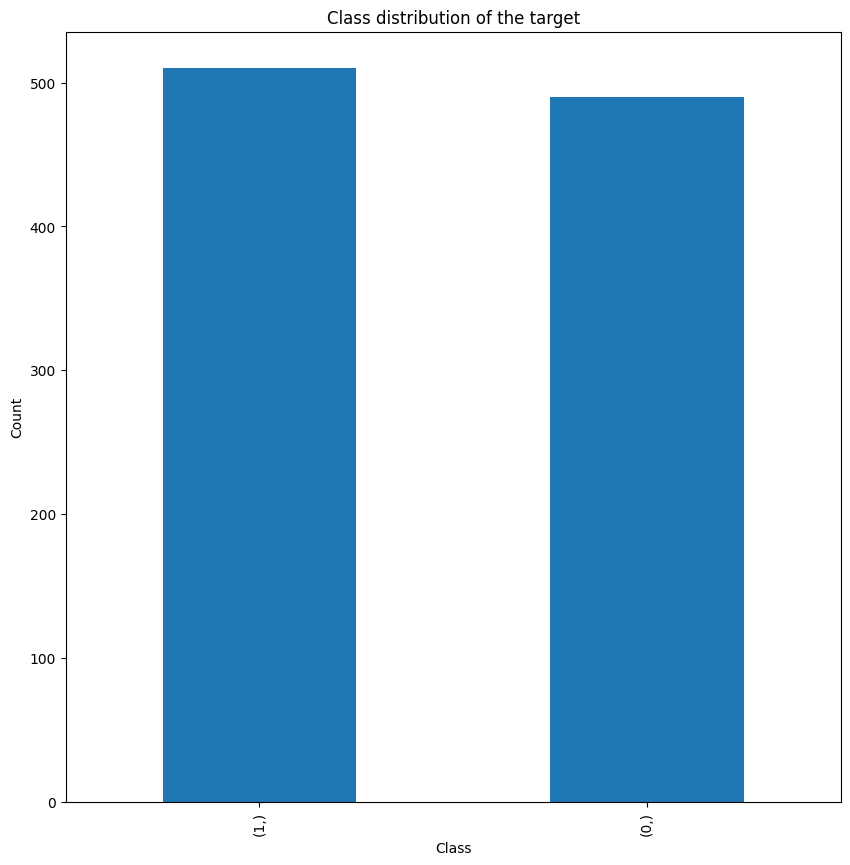

In [10]:
plt.figure(figsize=(10, 10))
#plot a bar plot of each class 0 and 1
label_df.value_counts().plot(kind='bar')
plt.title('Class distribution of the target')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

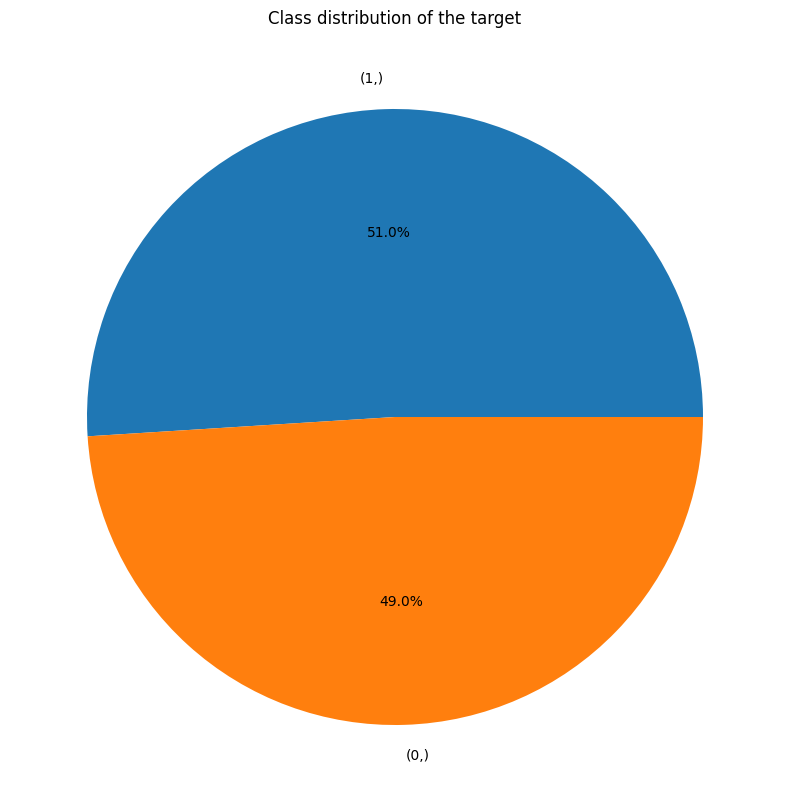

In [11]:
#plot a pie chart for the same
plt.figure(figsize=(10, 10))
label_df.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Class distribution of the target')
plt.show()

### We can say that the dataset is balanced

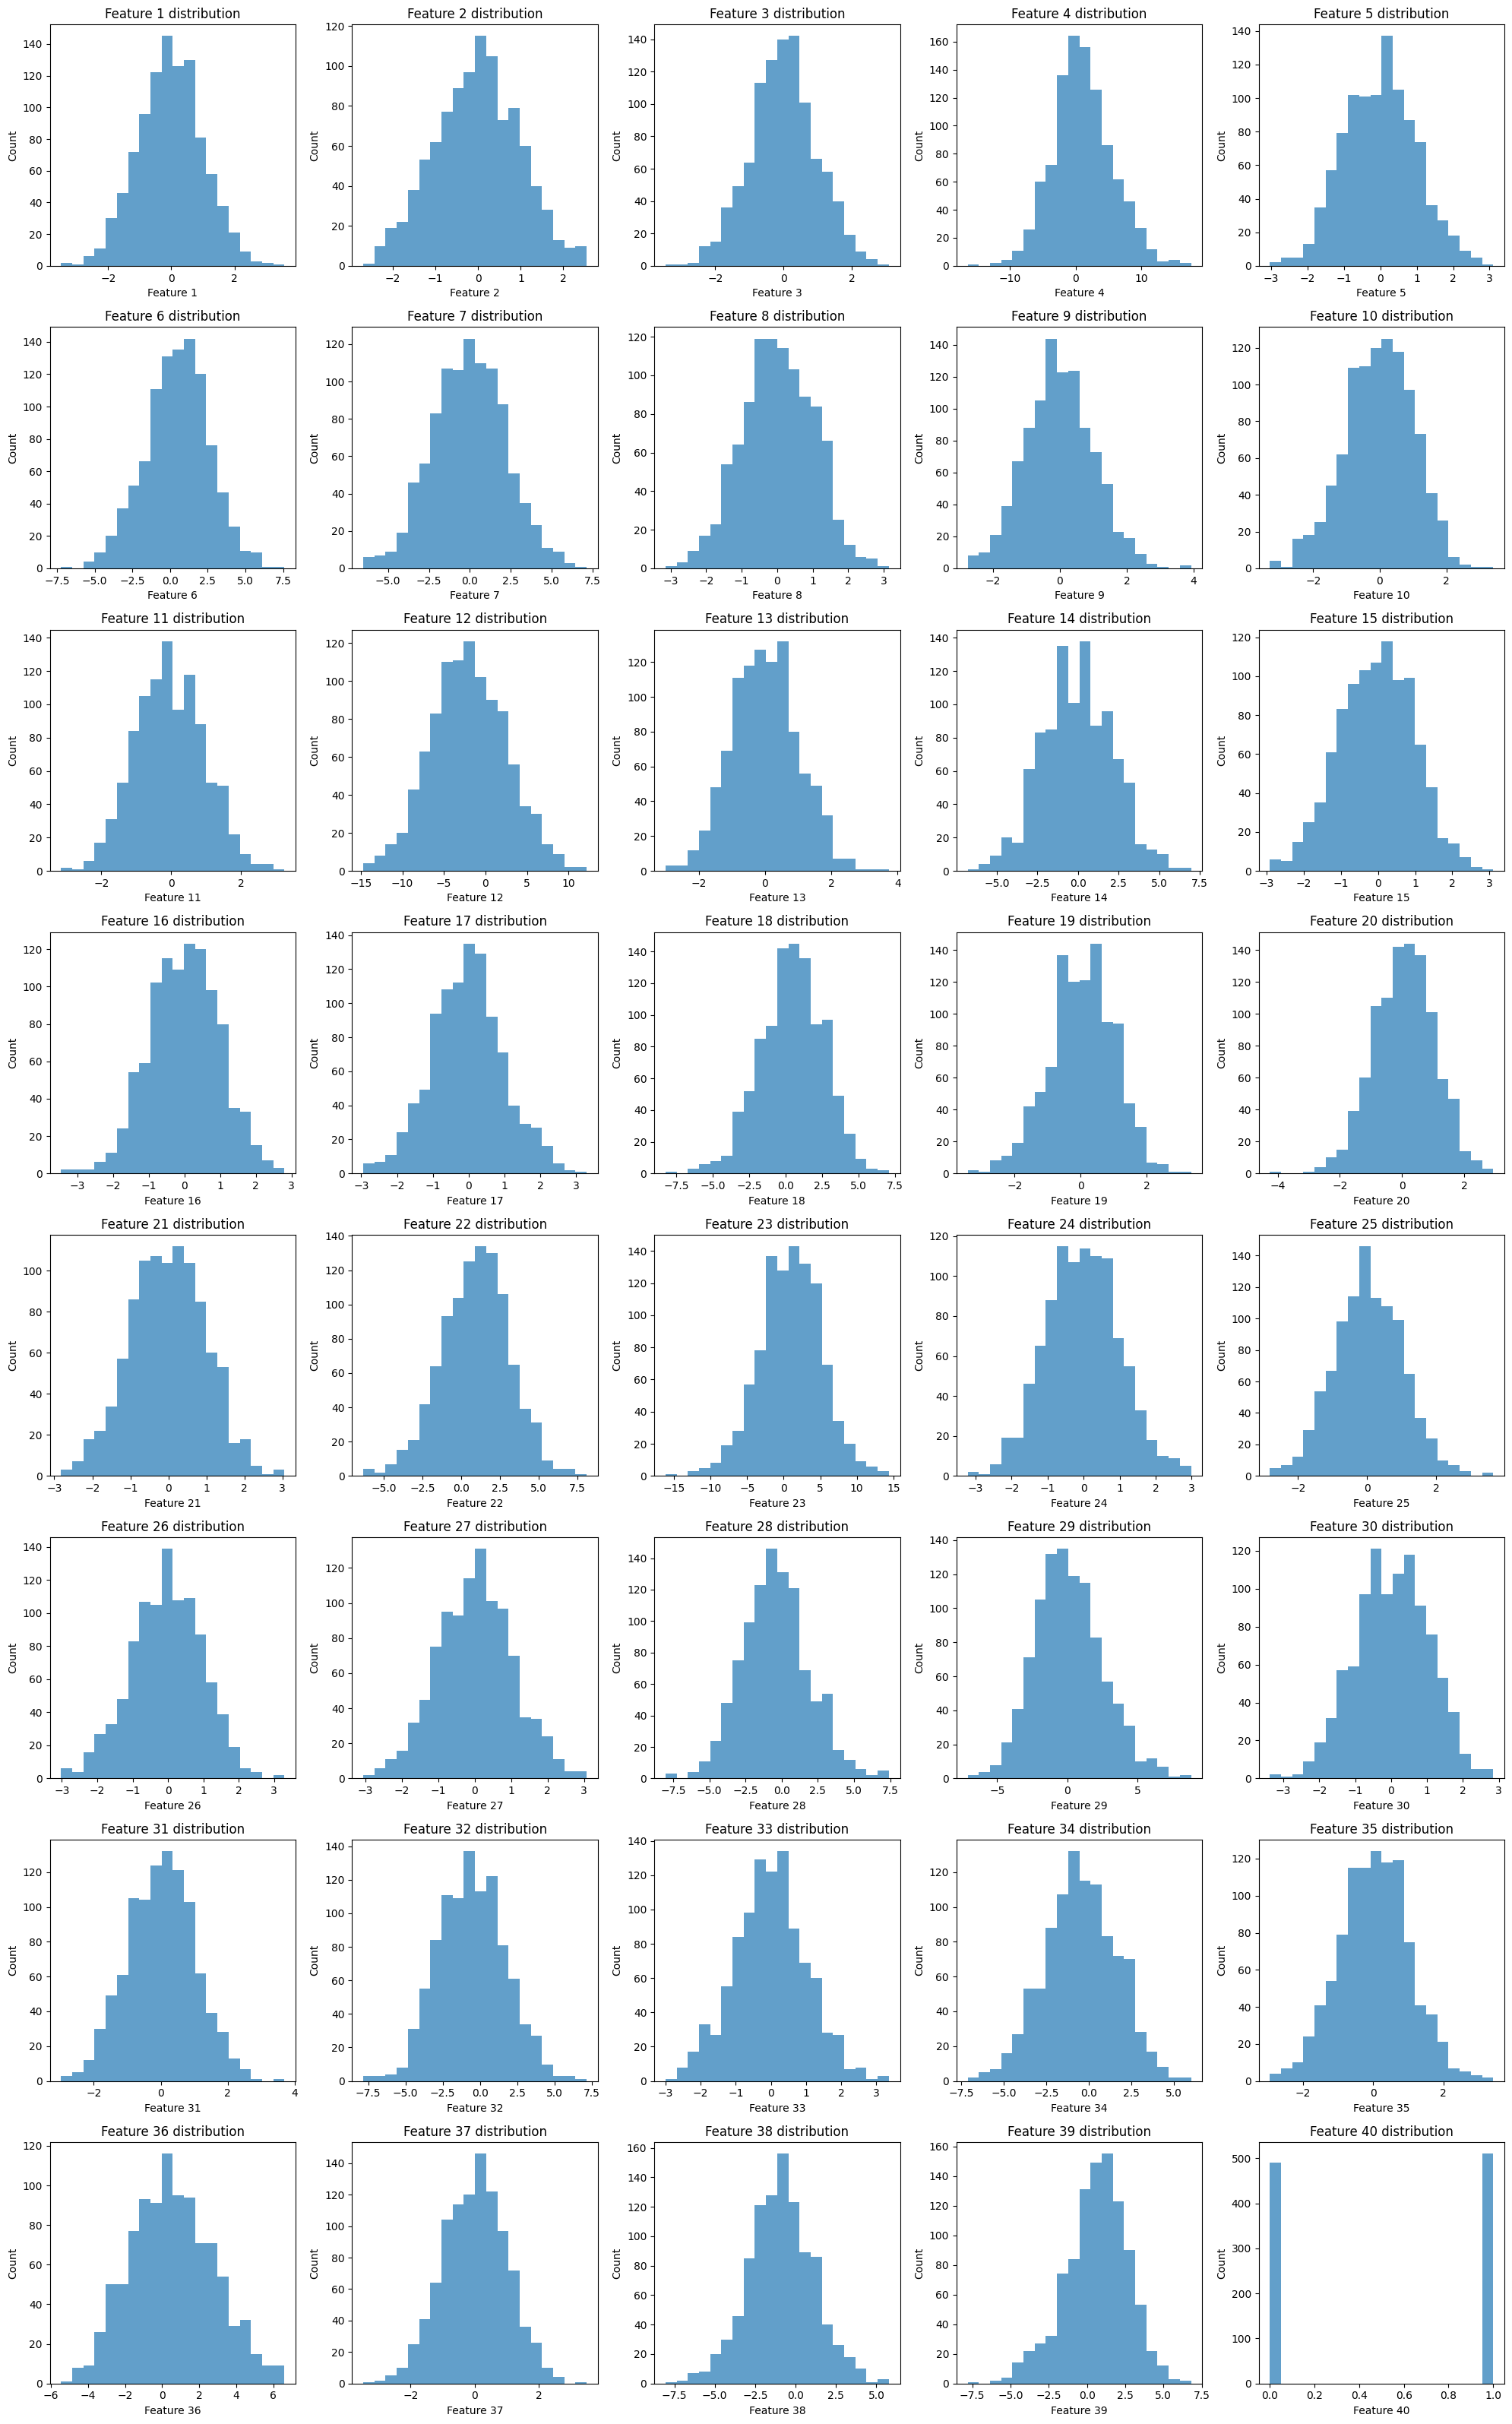

In [12]:
#plot distribution of the features
num_features = 40
num_rows = 8
num_cols = 5

fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 4*num_rows))

for i, ax in enumerate(axs.flatten()):
    if i < num_features:
        ax.hist(df_train[df_train.columns[i + 1]], bins=20, alpha=0.7)
        ax.set_title(f'Feature {i + 1} distribution')
        ax.set_xlabel(f'Feature {i + 1}')
        ax.set_ylabel('Count')
    else:
        ax.axis('off')  # turn off extra subplots if there are more than 40 features

plt.tight_layout()
plt.show()


In [13]:
def calculate_outlier_percentage(dataframe):
    outlier_percentage = {}
    
    for i, feature in enumerate(dataframe.columns):
        # Calculate the interquartile range (IQR)
        Q1 = dataframe[feature].quantile(0.25)
        Q3 = dataframe[feature].quantile(0.75)
        IQR = Q3 - Q1
        
        # Calculate the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Count the number of outliers
        num_outliers = len(dataframe[(dataframe[feature] < lower_bound) | (dataframe[feature] > upper_bound)])
        
        # Calculate the percentage of outliers
        percentage = (num_outliers / len(dataframe)) * 100
        
        # Store the percentage of outliers for the feature
        outlier_percentage[f'feature {i}'] = percentage
    
    return outlier_percentage

unscaled_outlier_percentage = calculate_outlier_percentage(df_train)

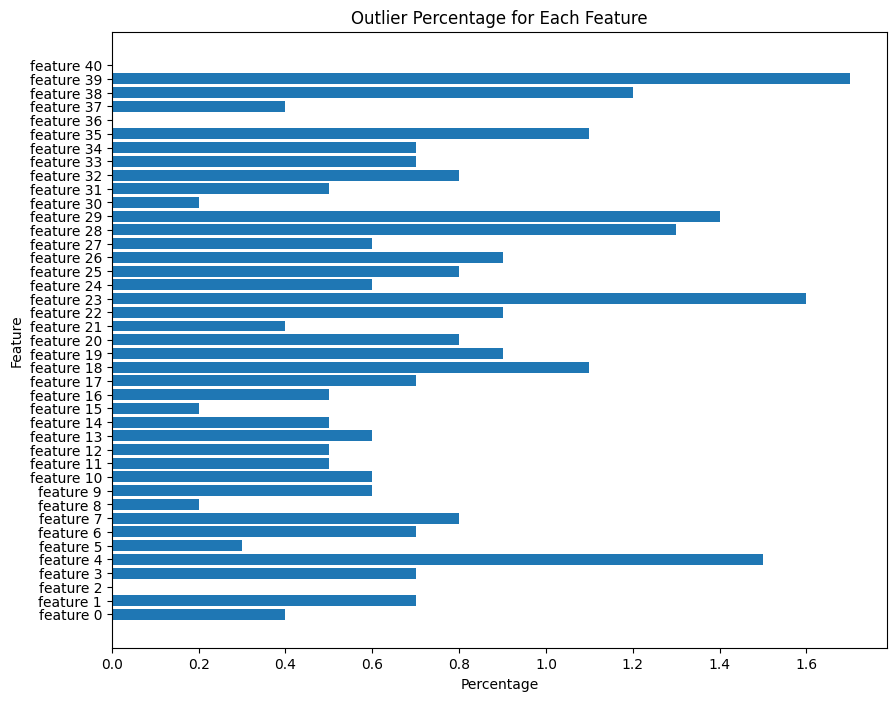

In [14]:
import matplotlib.pyplot as plt

# Convert the outlier_percentage dictionary to a pandas DataFrame
df_outliers = pd.DataFrame.from_dict(unscaled_outlier_percentage, orient='index', columns=['Percentage'])

# Sort the DataFrame by the outlier percentage in descending order

# Create the horizontal bar plot
plt.figure(figsize=(10, 8))
plt.barh(df_outliers.index, df_outliers['Percentage'])
plt.title('Outlier Percentage for Each Feature')
plt.xlabel('Percentage')
plt.ylabel('Feature')
plt.show()


In [15]:
train_df.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39],
           dtype='int64')

In [16]:
df_train.columns = [i for i in range(0,40)]+ ['target']

In [17]:
features_with_outliers = np.arange(0, 40)
scaler = RobustScaler()

# Scale the selected features
df_train_scaled = df_train.copy()
df_train_scaled[features_with_outliers] = scaler.fit_transform(df_train[features_with_outliers])



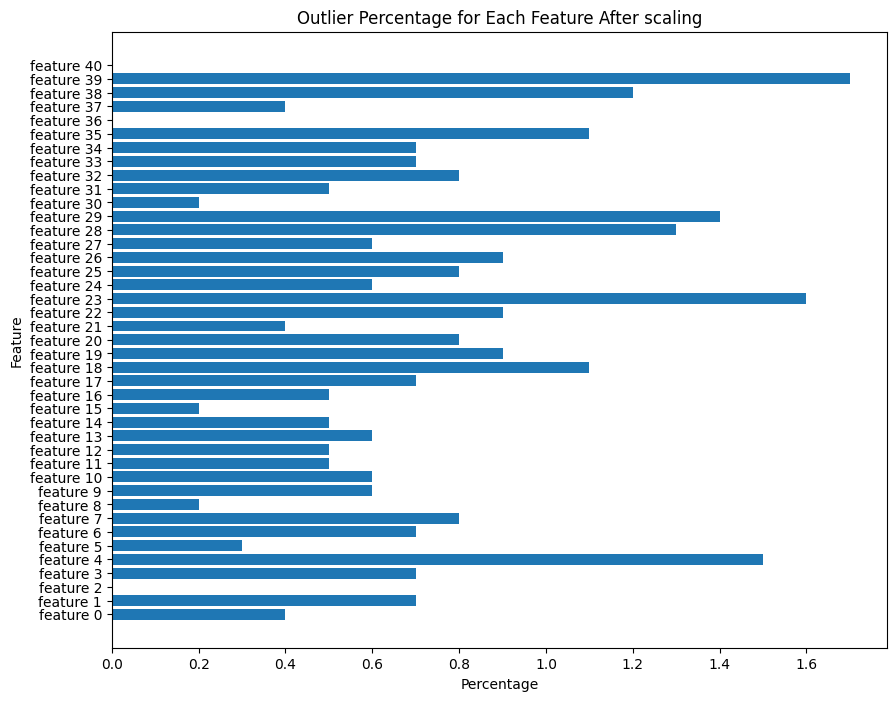

In [18]:
#Now find the outliers percentage after scaling it and plot it 
scaled_outlier_percentage = calculate_outlier_percentage(df_train_scaled)

df_outliers_scaled = pd.DataFrame.from_dict(scaled_outlier_percentage, orient='index', columns = ['Percentage'])

#Create the horizontal bar plot 
plt.figure(figsize=(10, 8))
plt.barh(df_outliers_scaled.index, df_outliers_scaled['Percentage'])
plt.title('Outlier Percentage for Each Feature After scaling')
plt.xlabel('Percentage')
plt.ylabel('Feature')
plt.show()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df_train_scaled.iloc[:, :-1], df_train_scaled['target'], test_size=0.2, random_state=42)

## Model Selection for the selected data

In [20]:
training_score = []
testing_score = []

In [21]:
def model_prediction(model):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    training_score.append(train_accuracy)
    testing_score.append(test_accuracy)
    print(f"Training accuracy: {train_accuracy}")
    print(f"Testing accuracy: {test_accuracy}")
    

### Support Vector Classifier Model

In [22]:
model_prediction(SVC())

Training accuracy: 0.95875
Testing accuracy: 0.875


### Random-Forest-Classifier Model

In [23]:
model_prediction(RandomForestClassifier())

Training accuracy: 1.0
Testing accuracy: 0.865


### Ada-Boost Classifier Model

In [24]:
model_prediction(AdaBoostClassifier())

Training accuracy: 0.90125
Testing accuracy: 0.79


### Gradient-Boosting-Classifier Model

In [25]:
model_prediction(GradientBoostingClassifier())

Training accuracy: 0.9975
Testing accuracy: 0.88


### LGBM Classifier model

In [26]:
model_prediction(LGBMClassifier())

[LightGBM] [Info] Number of positive: 416, number of negative: 384
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000749 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10200
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.520000 -> initscore=0.080043
[LightGBM] [Info] Start training from score 0.080043
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

### XGBClassifier Model

In [27]:
model_prediction(XGBClassifier())

Training accuracy: 1.0
Testing accuracy: 0.885


### Cat-Boost-Classifier

In [28]:
model_prediction(CatBoostClassifier(verbose=False))

Training accuracy: 1.0
Testing accuracy: 0.895


### All Model Performance Comparison

In [29]:
models = ["SVC", "RandomForest", "AdaBoost", "GradientBoost", "LGBM", "XGB", "CatBoost"]

In [30]:
df = pd.DataFrame({'Model': models, 'Training Accuracy': training_score, 'Testing Accuracy': testing_score})

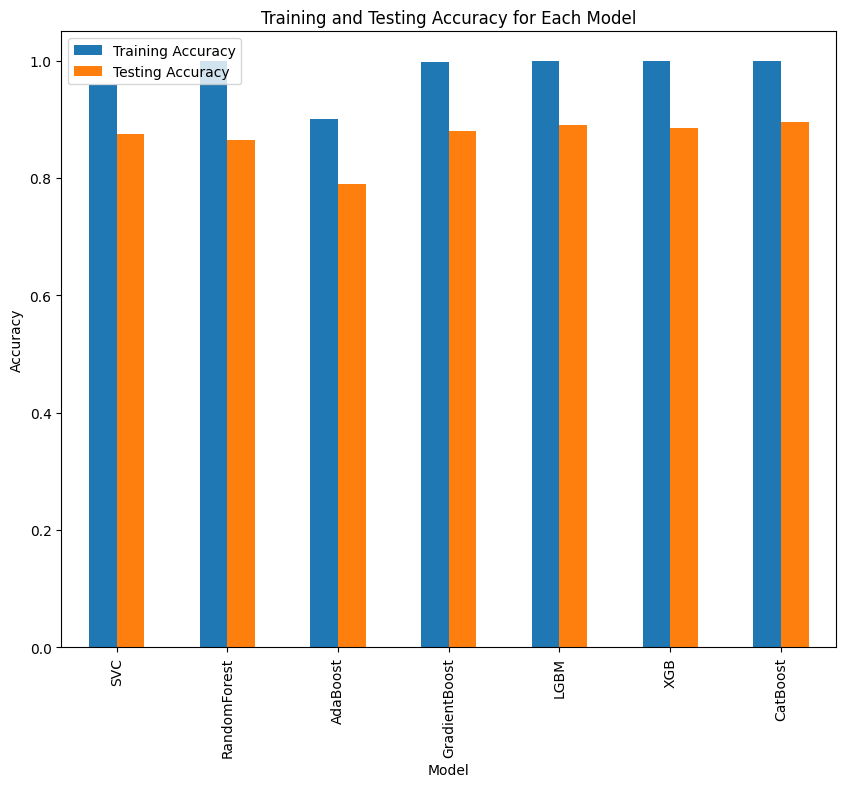

In [31]:
##Plotting the above results as column-bar chart
df.plot(x='Model', y=['Training Accuracy', 'Testing Accuracy'], kind='bar', figsize=(10, 8))
plt.title('Training and Testing Accuracy for Each Model')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.show()

### Hyperparameter tuning of LGBM Model

In [32]:
model1 = LGBMClassifier()

In [33]:
parameters1 = {"n_estimators": [100, 200, 300, 400, 500],
               "learning_rate" : [0.01, 0.05, 0.1, 0.5, 1],
               "random_state" : [42],
               "num_leaves" : [16, 17,18] }

In [34]:
grid_search1 = GridSearchCV(model1, parameters1, scoring='accuracy', n_jobs=-1, cv=5)

In [35]:
grid_search1.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 416, number of negative: 384
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001039 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10200
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.520000 -> initscore=0.080043
[LightGBM] [Info] Start training from score 0.080043
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.5, 1],
                         'n_estimators': [100, 200, 300, 400, 500],
                         'num_leaves': [16, 17, 18], 'random_state': [42]},
             scoring='accuracy')

In [36]:
grid_search1.best_score_

0.9025000000000001

In [37]:
best_parameters1 = grid_search1.best_params_
print(best_parameters1)

{'learning_rate': 0.1, 'n_estimators': 300, 'num_leaves': 18, 'random_state': 42}


### Create that LGBM Model using the best parameters

In [38]:
model1 = LGBMClassifier(**best_parameters1)

In [39]:
model1.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 416, number of negative: 384
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000952 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10200
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.520000 -> initscore=0.080043
[LightGBM] [Info] Start training from score 0.080043
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

LGBMClassifier(n_estimators=300, num_leaves=18, random_state=42)

In [40]:
X_test_pred1 = model1.predict(X_test)

In [41]:
accuracy_score(y_test, X_test_pred1)

0.885

### Hyper-Parameter Tuning of CatBoost Model

In [42]:
model2 = CatBoostClassifier(verbose = False)

In [43]:
parameters2 = {"learning_rate": np.arange(0.1, 0.7), 
               "random_state": [42], 
               "depth": [8,9,10], 
               "iterations": [35, 40, 50]}
grid_search2 = GridSearchCV(model2, parameters2, cv =5, n_jobs = -1, scoring='accuracy')

In [44]:
grid_search2.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x0000027B43325750>,
             n_jobs=-1,
             param_grid={'depth': [8, 9, 10], 'iterations': [35, 40, 50],
                         'learning_rate': array([0.1]), 'random_state': [42]},
             scoring='accuracy')

In [45]:
grid_search2.best_score_

0.8862499999999999

In [46]:
best_parameters2 = grid_search2.best_params_
best_parameters2

{'depth': 8, 'iterations': 50, 'learning_rate': 0.1, 'random_state': 42}

### Creating CatBoost Model using best params

In [47]:
model2 = CatBoostClassifier(**best_parameters2, verbose = False)

In [48]:
model2.fit(X_train, y_train)

In [49]:
X_test_pred2 = model2.predict(X_test)

In [50]:
accuracy_score(y_test, X_test_pred2)

0.87

### Hyperparameter tuning of XGBoost Model

In [51]:
model3 = XGBClassifier()

In [52]:
parameters3 = {"n_estimators": [50, 100,150], 
               "random_state": [42],
               "learning_rate": [0.1, 0.3, 0.5, 1.0]}

In [53]:
grid_search3 = GridSearchCV(model3, parameters3, cv  = 5, n_jobs = -1, scoring='accuracy')

In [54]:
grid_search3.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.3, 0.5, 1.0],
                         'n_estimators': [50, 100, 150], 'random_state': [42]},
             scoring='accuracy')

In [55]:
grid_search3.best_score_

0.89875

In [56]:
best_parameters3 = grid_search3.best_params_

### Creating XGBoost Model using best params

In [57]:
model3 = XGBClassifier(**best_parameters3)

In [58]:
model3.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [59]:
X_test_pred3 = model3.predict(X_test)

In [60]:
accuracy_score(y_test, X_test_pred3)

0.905

###  HyperParameter tuning of RandomForestClassifier

In [61]:
model4 = RandomForestClassifier()

In [62]:
parameters4 = {'n_estimators': [100, 300, 500, 550],
               'min_samples_split': [7,8,9], 
                'max_depth': [10,11,12], 
                'min_samples_leaf': [4,5,6]}
grid_search4 = GridSearchCV(model4, parameters4, cv = 5, n_jobs = -1, scoring='accuracy')

In [63]:
grid_search4.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 11, 12],
                         'min_samples_leaf': [4, 5, 6],
                         'min_samples_split': [7, 8, 9],
                         'n_estimators': [100, 300, 500, 550]},
             scoring='accuracy')

In [64]:
grid_search4.best_score_

0.8699999999999999

In [65]:
best_parameters4 = grid_search4.best_params_
best_parameters4

{'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 8,
 'n_estimators': 300}

### Creating Random Forest Model using best params

In [66]:
model4 = RandomForestClassifier(**best_parameters4)

In [67]:
model4.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=8,
                       n_estimators=300)

In [68]:
X_test_pred4 = model4.predict(X_test)

In [69]:
accuracy_score(y_test, X_test_pred4)

0.88

### Stacking Classifier Model

In [70]:
stacking_model = StackingClassifier(estimators = [('LGBM', model1),
('CatBoost', model2),
('XGBoost', model3), 
('RandomForest', model4)])

In [71]:
stacking_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 416, number of negative: 384
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000717 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10200
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.520000 -> initscore=0.080043
[LightGBM] [Info] Start training from score 0.080043
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

StackingClassifier(estimators=[('LGBM',
                                LGBMClassifier(n_estimators=300, num_leaves=18,
                                               random_state=42)),
                               ('CatBoost',
                                <catboost.core.CatBoostClassifier object at 0x0000027B46FA62D0>),
                               ('XGBoost',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              early_stopping_rounds=None,
                                              enable_cat...
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              predictor=None, random_state=42, ...)),
                               ('RandomForest',
                                RandomForestClassifier(max_depth=10,
                                                       min_samples_leaf=4,
                                                       min_samples_split=8,
                                                       n_estimators=300))])

In [72]:
X_train_pred5 = stacking_model.predict(X_train)

In [73]:
X_test_pred5 = stacking_model.predict(X_test)

In [74]:
print(f'Stacking model training data is {accuracy_score(y_train, X_train_pred5)}')

Stacking model training data is 1.0


In [75]:
print(f'Stacking model testing data is {accuracy_score(y_test, X_test_pred5)}')

Stacking model testing data is 0.89


In [76]:
# Create a DataFrame for the predictions
#there should be id and the preds as Solution
df_preds = pd.DataFrame({'Id': range(1, len(df_test) + 1), 'Solution': stacking_model.predict(df_test)})

In [77]:
df_preds.to_csv('submission.csv', index=False)